# Programming Exercise 3: Logistic Regression



## Introduction

In this exercise, you will implement logistic regression and apply it to two different datasets.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

### Section 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

The following cell will load the data and corresponding labels:

In [2]:
import os
print(os.getcwd())

c:\Users\RoeiM\OneDrive\Desktop\Machine Learning\ex_3_ML


In [3]:
import sys
print(sys.executable)

C:\Users\RoeiM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


In [4]:
import pandas as pd
import numpy as np

In [5]:
students = pd.read_csv("ex2data1.txt", names=["First_Exam", "Second_Exam", "Admission_Status"])
# type casting from pandas series and pandas dataframe to numpy array
X = np.array(students[["First_Exam", "Second_Exam"]])
y = np.array(students["Admission_Status"])
# size of dataset
number_of_samples = y.size
# size of X matrix, m= rows, n= features
m,n = X.shape
print('size of samples: {}'.format(number_of_samples))

size of samples: 100


In [6]:
students.head()

,First_Exam,Second_Exam,Admission_Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
please visualize the first dataset using the package `matplotlib`.

In [7]:
import matplotlib.pyplot as plt

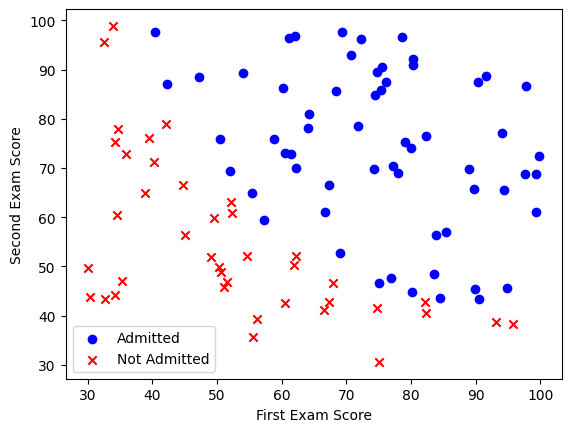

In [8]:
admitted = students[students['Admission_Status'] == 1]
not_admitted = students[students['Admission_Status'] == 0]

plt.scatter(admitted['First_Exam'], admitted['Second_Exam'], label='Admitted', color='blue', marker='o')
plt.scatter(not_admitted['First_Exam'], not_admitted['Second_Exam'], label='Not Admitted', color='red', marker='x')
plt.xlabel('First Exam Score')
plt.ylabel('Second Exam Score')
plt.legend()
plt.show()

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**


In [9]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [10]:
# Test sigmoid function
z = 0
g = sigmoid(z)

print("Actual value of sigmoid(0) should be 0.5")
print("Computed value of sigmoid(0) is {sigmoid}".format(sigmoid= g))

Actual value of sigmoid(0) should be 0.5
Computed value of sigmoid(0) is 0.5


#### 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X.


In [11]:
# Add intercept term to martix X
X = np.concatenate([np.ones((len(X), 1)), X], axis= 1)
### Make theta_0 as the bias term
print("Shape of X after adding intercept term:", X.shape)

Shape of X after adding intercept term: (100, 3)


Note that the parameter $\theta_0$ represents the bias term in the model's weights.
Now, complete the code for the function `cost_function` to return the cost value and define `gradient_descent` to reteun gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [12]:
def cost_function(theta, X, y):    
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    J = 1/m * (-y @ np.log(h + epsilon) - (1-y) @ np.log(1 - h + epsilon))

    return J

In [13]:
def gradient_descent(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1/m) * X.T @ (h - y)

    return grad

In [14]:
initial_theta = np.zeros(n+1)
grad = gradient_descent(initial_theta, X, y)
cost = cost_function(initial_theta,X,y)
print("Shape of cost value is: {}".format(cost))
print("Shape of grad is: {}".format(grad.shape))

Shape of cost value is: 0.6931271807599428
Shape of grad is: (3,)


### calculate the optimal theta using stochastic gradient deacent




In [15]:
def train_using_sgd(theta, X, y, learning_rate=0.01, epochs=100):
# Train the logistic regression model using stochastic gradient descent
    m = len(y)
    for epoch in range(1, epochs+1):
        for i in range(m):
            xi = X[i]
            yi = y[i]
            hi = sigmoid(xi @ theta)
            gradient = (hi - yi) * xi.T
            theta = theta - learning_rate * gradient.flatten()
        if epoch % (epochs / 10) == 0:
            cost = cost_function(theta, X, y)
            print(f'Epoch {epoch}, Cost: {cost}')
    return theta

In [16]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set learning rate and number of epochs
learning_rate = 0.0001
epochs = 100_000

# Train the logistic regression model using stochastic gradient descent
theta_optimized = train_using_sgd(initial_theta, X, y, learning_rate, epochs)

# Print the optimized theta
print("Optimized theta:", theta_optimized)

# Compute the final cost
final_cost = cost_function(theta_optimized, X, y)
print("Final cost:", final_cost)

Epoch 10000, Cost: 0.47540317027160045
Epoch 20000, Cost: 0.38103637727256484
Epoch 30000, Cost: 0.3373712841859597
Epoch 40000, Cost: 0.3118994319405381
Epoch 50000, Cost: 0.29502227768931427
Epoch 60000, Cost: 0.28293394626358065
Epoch 70000, Cost: 0.2738153169505137
Epoch 80000, Cost: 0.2666797448531458
Epoch 90000, Cost: 0.26094153721639696
Epoch 100000, Cost: 0.25622882364536537
Optimized theta: [-16.04621243   0.13947329   0.13600827]
Final cost: 0.25622882364536537


In [17]:
print("Optimized theta is: {}".format(theta_optimized))
optimized_cost = cost_function(theta_optimized, X, y)
print("Optimized Cost value is: {:.4f}".format(optimized_cost))


Optimized theta is: [-16.04621243   0.13947329   0.13600827]
Optimized Cost value is: 0.2562


### Plot the decision boundary obtained from the logistic regression model trained using gradient descent

---



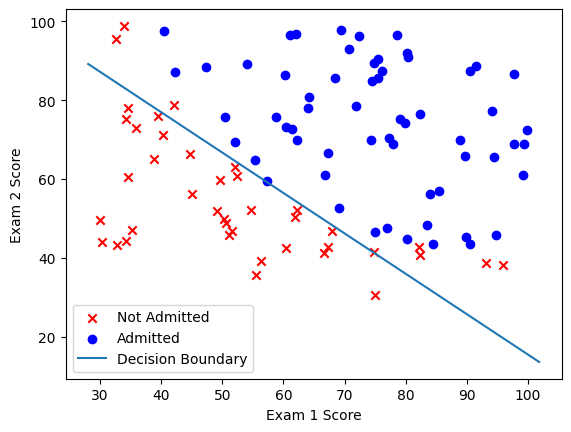

In [18]:
def plot_decision_boundary(theta, X, y):
    # Plot the original data points
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', marker='x', label='Not Admitted')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', marker='o', label='Admitted')
    
    # Plot the decision boundary
    x_values = [np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')

    # Add labels and legend
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend()
    plt.show()

# Call the function with the optimized theta
plot_decision_boundary(theta_optimized, X, y)


#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 53 and an Exam 2 score of 94, print the admission
probability.

In [19]:
if X.shape[1] == 2:
    X = np.insert(X, 0, 1, axis=1)

In [20]:
def predict(theta, X):
    probabilities = sigmoid(np.dot(X, theta))
    predicted = probabilities >= 0.5
    return predicted

In [21]:
def accuracy(y_pred, y):
    diff = y_pred != y
    errors = np.sum(diff)
    accuracy = 1 - (errors / len(y))
    return accuracy

After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [22]:
# Predict on the training set
y_pred = predict(theta_optimized, X)

# Calculate the training accuracy
train_accuracy = accuracy(y_pred, y)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Predict probability for a new student with specific scores
new_student_scores = np.array([45, 85])

# Add intercept term
new_student_scores = np.insert(new_student_scores, 0, 1)

# Compute the probability
probability = sigmoid(np.dot(new_student_scores, theta_optimized))

print(f"Admission probability for a student with scores 45 and 85: {probability:.4f}")

Training Accuracy: 92.00%
Admission probability for a student with scores 45 and 85: 0.8570


plot the AUC and the ROC curve on your model



```
# This is formatted as code
```

## Section 2 Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [23]:
microchips= pd.read_csv("ex2data2.txt", names=["First_Test", "Second_Test", "Status"])
# Type casting from pandas series and pandas dataframe to numpy array
X = np.array(microchips[["First_Test", "Second_Test"]])
y = np.array(microchips["Status"])
# Size of dataset
number_of_samples = y.size
# Size of X matrix, m = rows, n = features
m,n = X.shape
print('size of samples: {}'.format(number_of_samples))

size of samples: 118


### 2.1 Visualize the data

Similar to the previous parts of this exercise, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

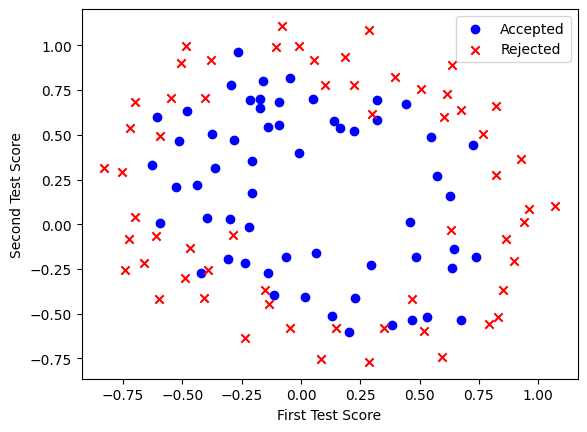

In [24]:
admitted_chips = microchips[microchips['Status'] == 1]
not_admitted_chips = microchips[microchips['Status'] == 0]

plt.scatter(admitted_chips['First_Test'], admitted_chips['Second_Test'], label='Accepted', color='blue', marker='o')
plt.scatter(not_admitted_chips['First_Test'], not_admitted_chips['Second_Test'], label='Rejected', color='red', marker='x')
plt.xlabel('First Test Score')
plt.ylabel('Second Test Score')
plt.legend()
plt.show()

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. In the function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{map_feature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [25]:
def map_feature(X1, X2, degree=6):
    array_like = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            array_like = np.hstack((array_like, (X1 ** (i - j) * X2 ** j).reshape(-1, 1)))
    return array_like

In [26]:
X = map_feature(X[:,0], X[:,1])

### 2.3 Cost function and gradient
Note that the parameter $\theta_0$ represents the bias term in the model's weights.
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `cost_function_gradient_descent_regularized` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

In [27]:
def cost_function_gradient_descent_regularized(theta, X, y, lambda_):
    # Number of training examples
    m = y.size

    # Hypothesis
    h = sigmoid(np.dot(X, theta))

    # Regularized cost function
    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(h)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Gradient calculation
    grad = (1 / m) * np.dot(X.T, (h - y))
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

    return J, grad

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
# Define the predict function
def predict(theta, X):
    probabilities = sigmoid(np.dot(X, theta))
    predicted = probabilities >= 0.5
    return predicted

# Accuracy function
def accuracy(y_pred, y):
    diff = y_pred != y
    errors = np.sum(diff)
    accuracy = 1 - (errors / len(y))
    return accuracy

#### 2.3.1 Learning parameters using momentum

Similar to the previous parts, you will optimize the Regularized logistic regression using the momentum algorithm optimize the model with $\lambda = 1$, $\lambda = 0$

In [30]:
def train_using_momentum(theta, X, y, learning_rate,beta, lmbda, epochs=100):
    
    # Number of training examples
    m = y.size
    J_history = []

    # Initialize velocity
    v = np.zeros_like(theta)

    for epoch in range(epochs):
        J, grad = cost_function_gradient_descent_regularized(theta, X, y, lmbda)

        # Update velocity
        v = beta * v + grad

        # Update parameters
        theta = theta - learning_rate * v

        # Save the cost J in every iteration
        J_history.append(J)

        if epoch % (epochs / 10) == 0:
            print(f"Epoch {epoch}/{epochs} - Cost: {J:.4f}")

    return theta, J_history

In [31]:
# Train the model using momentum
initial_theta = np.zeros(X.shape[1])
learning_rate = 0.001
beta = 0.9
lmbda = 1
epochs = 10000

theta_optimized, J_history = train_using_momentum(initial_theta, X, y, learning_rate, beta, lmbda, epochs)

# Compute accuracy on our training set
model_predicted = predict(theta_optimized, X)

train_accuracy = accuracy(model_predicted, y)
print("Train Accuracy: {:.1f}".format(train_accuracy * 100))
print("Expected accuracy (with lambda = 1): 83.1 % (approx)\n")

Epoch 0/10000 - Cost: 0.6931
Epoch 1000/10000 - Cost: 0.7781
Epoch 2000/10000 - Cost: 0.7884
Epoch 3000/10000 - Cost: 0.8027
Epoch 4000/10000 - Cost: 0.8183
Epoch 5000/10000 - Cost: 0.8335
Epoch 6000/10000 - Cost: 0.8475
Epoch 7000/10000 - Cost: 0.8601
Epoch 8000/10000 - Cost: 0.8714
Epoch 9000/10000 - Cost: 0.8813
Train Accuracy: 83.1
Expected accuracy (with lambda = 1): 83.1 % (approx)



### plot the decision boundery for $\lambda =1$




In [32]:
pos = y == 1
neg = y == 0


In [33]:
def plot_graph(theta_optimized, lmbda):
    plt.scatter(admitted_chips['First_Test'], admitted_chips['Second_Test'], label='Accepted', color='blue', marker='o')
    plt.scatter(not_admitted_chips['First_Test'], not_admitted_chips['Second_Test'], label='Rejected', color='red', marker='x')

    # Create a grid of points to predict
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    # Evaluate z = theta_optimized * X for each point in the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = np.dot(map_feature(np.array([u[i]]), np.array([v[j]])), theta_optimized)

    # Transpose z before calling contour
    z = z.T

    # Plot decision boundary
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    plt.xlabel('First Test Score')
    plt.ylabel('Second Test Score')
    plt.legend()
    plt.title(f'Decision Boundary for λ = {str(lmbda)}')
    plt.show()

C:\Users\RoeiM\AppData\Local\Temp\ipykernel_2776\3441730479.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(map_feature(np.array([u[i]]), np.array([v[j]])), theta_optimized)


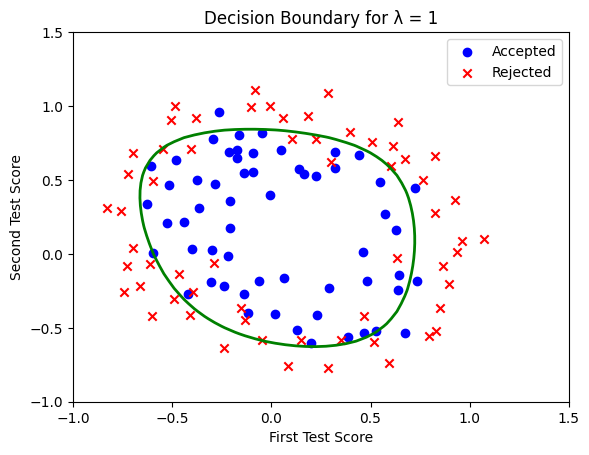

In [34]:
plot_graph(theta_optimized, 1)

### plot the decision boundery for $\lambda=0$




In [35]:
pos = y == 1
neg = y == 0



In [36]:
lmbda = 0
theta_optimized, J_history = train_using_momentum(initial_theta, X, y, learning_rate, beta, lmbda, epochs)

# Compute accuracy on our training set
model_predicted = predict(theta_optimized, X)

train_accuracy = accuracy(model_predicted, y)
print("Train Accuracy: {:.1f}".format(train_accuracy * 100))
print("Expected accuracy (with lambda = 0): 83.1 % (approx)\n")

Epoch 0/10000 - Cost: 0.6931
Epoch 1000/10000 - Cost: 0.7795
Epoch 2000/10000 - Cost: 0.7910
Epoch 3000/10000 - Cost: 0.8072
Epoch 4000/10000 - Cost: 0.8261
Epoch 5000/10000 - Cost: 0.8459
Epoch 6000/10000 - Cost: 0.8659
Epoch 7000/10000 - Cost: 0.8858
Epoch 8000/10000 - Cost: 0.9053
Epoch 9000/10000 - Cost: 0.9244
Train Accuracy: 83.1
Expected accuracy (with lambda = 0): 83.1 % (approx)



C:\Users\RoeiM\AppData\Local\Temp\ipykernel_2776\3441730479.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(map_feature(np.array([u[i]]), np.array([v[j]])), theta_optimized)


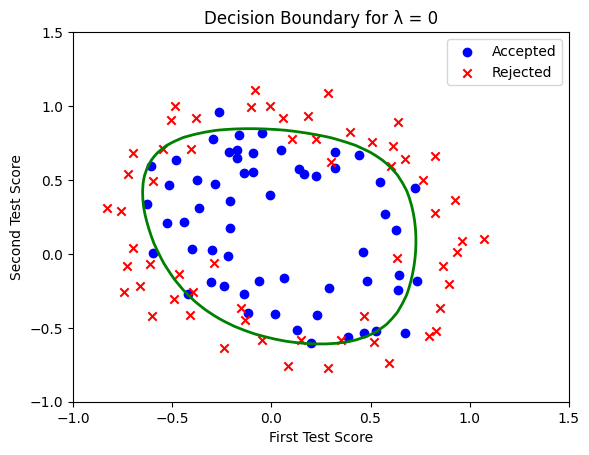

In [37]:
plot_graph(theta_optimized, lmbda)